In [430]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [431]:

random.seed(42)


def addGroup(cat,df,groups):
    for category, group in groups:
        if category == cat:
            df = df.append(group)
    
    return df

def count_number_falls(groups):
    falls = 0
    for category, group in groups:
        if 'fall' in group['label'].values:
            falls = falls + 1
    return falls

def count_number_normals(groups):
    normal = 0
    for category, group in groups:
        if 'normal' in group['label'].values:
            normal = normal + 1

    return normal

def verify_order(groupsId, grouped_data, index):
    
    lastLabel = ''
    label = ''

   
    for group in groupsId:
        # print(index)
        if 'fall' in grouped_data.get_group(group)['label'].values:
            label = 'fall'
        else:
            label = 'normal'

        if label == 'fall' and lastLabel == 'fall':
            return index
        
        lastLabel = label
        index = index + 1
    
    return True



    
df = pd.read_csv('old.csv')

new = pd.read_csv('new.csv')

new['testId'] = new['testId'] * 40

df = df.append(new)

df.dropna(inplace=True)
df['label'].isnull().sum()



0

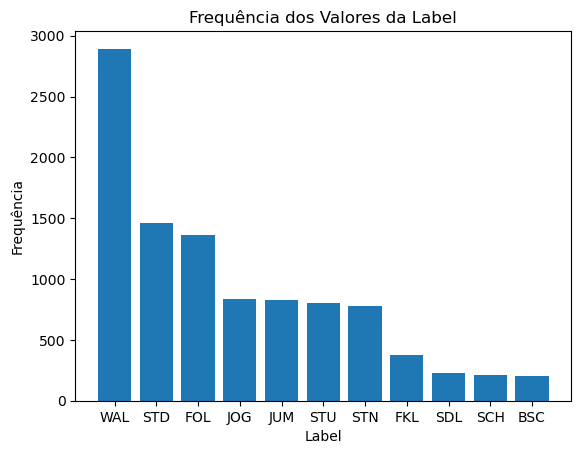

In [432]:
# Contar a frequência de cada valor único da coluna "label"
label_counts = df['label'].value_counts()

# Criar o gráfico de barras
plt.bar(label_counts.index, label_counts.values)

# Configurar o gráfico
plt.xlabel('Label')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores da Label')
plt.show()

[15, 15, 43, 28, 15, 15, 15, 40, 21, 14, 18]


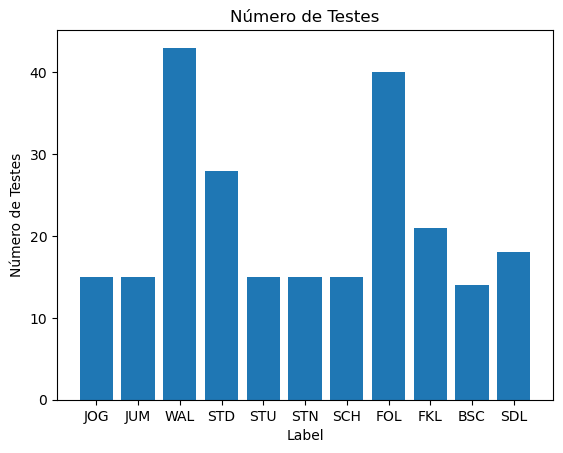

In [433]:

def count_number_labels(groups,labels):
    
    count_labels = [0,0,0,0,0,0,0,0,0,0,0]
    
    for category, group in groups:
        index = 0
        for label in labels:
            if label in group['label'].values:
                count_labels[index] = count_labels[index] + 1
            index = index + 1
            
    return count_labels



grouped_data = df.groupby('testId')




labels = ['WAL', 'STD','FOL','JOG', 'JUM','STU', 'STN','FKL','SDL', 'SCH','BSC']
count_labels =  count_number_labels(grouped_data,labels)

print(count_labels)


# Criar o gráfico de barras
plt.bar(labels, count_labels)

# Configurar o gráfico
plt.xlabel('Label')
plt.ylabel('Número de Testes')
plt.title('Número de Testes')
plt.show()

In [434]:

normal = ['JOG', 'JUM', 'WAL', 'STD', 'STU', 'STN','SCH']

fall = ['FOL', 'FKL','BSC','SDL']

for n in normal:
    df['label'] = df['label'].replace(n, 'normal')
    
for f in fall:
    df['label'] = df['label'].replace(f, 'fall')



grouped_data = df.groupby('testId')


groups = list(grouped_data.groups.keys())
random.shuffle(groups)


stop = 0

while stop != True:
    stop = verify_order(groups[stop:],grouped_data, stop)
    if stop != True:
        random.seed()
        random.shuffle(groups[stop:])
        

df = pd.DataFrame()


for group in groups:
    df = addGroup(group,df,grouped_data)


df.to_csv('teste.csv')


In [435]:
print(df)

      testId  sampleNo     acc_x     acc_y      acc_z    gyro_x    gyro_y  \
1601    1880         0 -3.112464  3.751348   9.136395 -0.095906  0.374002   
1602    1880         1 -3.026322  3.875774   8.892327 -0.300851  0.149662   
1603    1880         2 -2.954538  3.583850   8.810971 -0.226631 -0.185856   
1604    1880         3 -2.921038  3.110071   8.648259 -0.589943  0.257174   
1605    1880         4 -2.873182  2.866003   8.672188 -0.577878  0.521984   
...      ...       ...       ...       ...        ...       ...       ...   
5921     168         8 -3.748955  4.081557   7.628917 -0.617890 -0.799164   
5922     168         9 -2.633899  3.746562   8.408977  0.239459 -1.222799   
5923     168        10 -1.877768  3.090929  10.304092 -0.234267  0.241292   
5924     168        11 -2.002194  3.287140  10.428519 -0.454942 -0.074373   
5925     168        12 -2.361118  3.684349   9.562318  0.217010  0.235794   

        gyro_z   azimuth     pitch      roll label  
1601  0.564439  1.9265

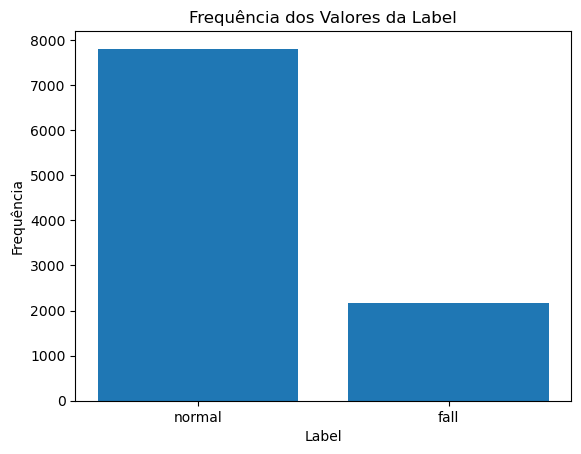

In [436]:
# Contar a frequência de cada valor único da coluna "label"
label_counts = df['label'].value_counts()

# Criar o gráfico de barras
plt.bar(label_counts.index, label_counts.values)

# Configurar o gráfico
plt.xlabel('Label')
plt.ylabel('Frequência')
plt.title('Frequência dos Valores da Label')
plt.show()

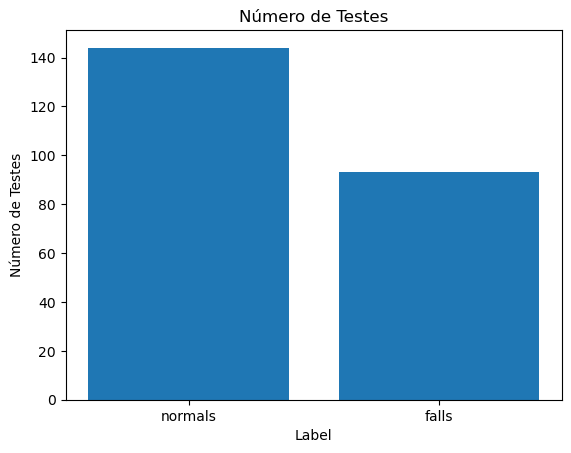

In [437]:
grouped_data = df.groupby('testId')

normals = count_number_normals(grouped_data)

falls = count_number_falls(grouped_data)

# Criar o gráfico de barras
plt.bar(['normals', 'falls'], [normals,falls])

# Configurar o gráfico
plt.xlabel('Label')
plt.ylabel('Número de Testes')
plt.title('Número de Testes')
plt.show()

In [438]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.10.0


In [439]:
activities = df['label'].value_counts().index
activities

Index(['normal', 'fall'], dtype='object')

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9978 entries, 1601 to 5925
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   testId    9978 non-null   int64  
 1   sampleNo  9978 non-null   int64  
 2   acc_x     9978 non-null   float64
 3   acc_y     9978 non-null   float64
 4   acc_z     9978 non-null   float64
 5   gyro_x    9978 non-null   float64
 6   gyro_y    9978 non-null   float64
 7   gyro_z    9978 non-null   float64
 8   azimuth   9978 non-null   float64
 9   pitch     9978 non-null   float64
 10  roll      9978 non-null   float64
 11  label     9978 non-null   object 
dtypes: float64(9), int64(2), object(1)
memory usage: 1013.4+ KB


In [441]:
df = df.drop(['testId', 'sampleNo'],axis='columns')
#df = vaex_df.copy()
df.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,label
1601,-3.112464,3.751348,9.136395,-0.095906,0.374002,0.564439,1.926506,-0.136580,0.396859,fall
1602,-3.026322,3.875774,8.892327,-0.300851,0.149662,0.598647,1.705570,-0.368070,0.323542,fall
1603,-2.954538,3.583850,8.810971,-0.226631,-0.185856,0.409738,1.748826,-0.328373,0.325729,fall
1604,-2.921038,3.110071,8.648259,-0.589943,0.257174,0.241292,1.774127,-0.303989,0.319928,fall
1605,-2.873182,2.866003,8.672188,-0.577878,0.521984,0.343764,1.799532,-0.279512,0.309393,fall


In [442]:
df['label'].value_counts()

normal    7806
fall      2172
Name: label, dtype: int64

In [443]:
array_label=df['label'].to_numpy()
array_label

array(['fall', 'fall', 'fall', ..., 'fall', 'fall', 'fall'], dtype=object)

In [444]:
lab = LabelEncoder()
label_En = lab.fit_transform(array_label)
label_En

array([0, 0, 0, ..., 0, 0, 0])

In [445]:
lab.classes_

array(['fall', 'normal'], dtype=object)

In [446]:
df_label=pd.DataFrame(label_En,columns=['label'])
df_label

df_label.value_counts()

df_label.count()


label    9978
dtype: int64

In [447]:
X = df[['acc_x', 'acc_y', 'acc_z','gyro_x','gyro_y','gyro_z','azimuth','pitch','roll']]
y = df_label


finalDF = df[['acc_x', 'acc_y', 'acc_z','gyro_x','gyro_y','gyro_z','azimuth','pitch','roll']]
finalDF['label'] =  label_En

finalDF.count()


acc_x      9978
acc_y      9978
acc_z      9978
gyro_x     9978
gyro_y     9978
gyro_z     9978
azimuth    9978
pitch      9978
roll       9978
label      9978
dtype: int64

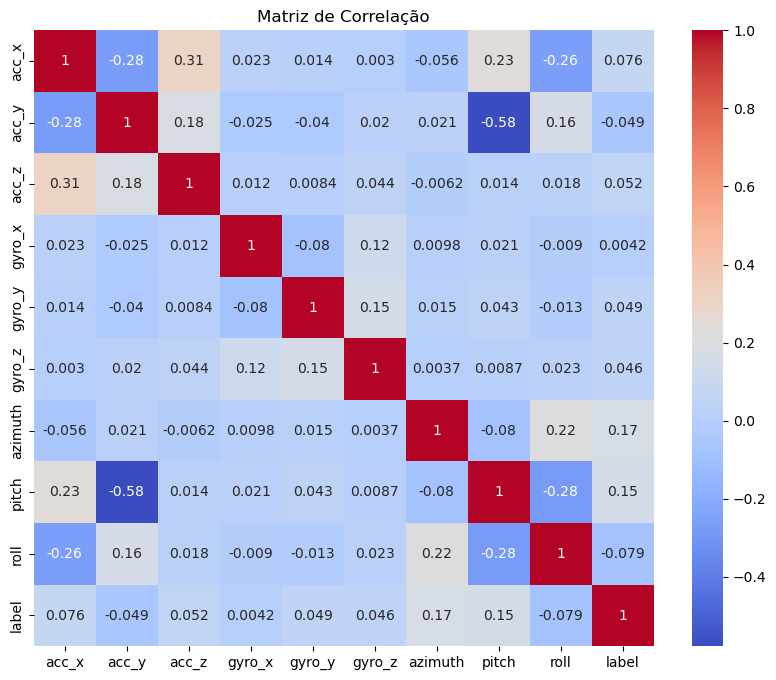

In [448]:

# Calcular a matriz de correlação
correlation_matrix = finalDF.corr()

# Criar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar o gráfico
plt.title('Matriz de Correlação')
plt.show()

In [449]:
import scipy.stats as stats
Fs = 15
frame_size = 30 # 30
hop_size = 10 # 15

In [450]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 9

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        acc_x = df['acc_x'].values[i: i + frame_size]
        acc_y = df['acc_y'].values[i: i + frame_size]
        acc_z = df['acc_z'].values[i: i + frame_size]
        gyro_x = df['gyro_x'].values[i: i + frame_size]
        gyro_y = df['gyro_y'].values[i: i + frame_size]
        gyro_z = df['gyro_z'].values[i: i + frame_size]
        azimuth = df['azimuth'].values[i: i + frame_size]
        pitch = df['pitch'].values[i: i + frame_size]
        roll = df['roll'].values[i: i + frame_size] 
        

        data = np.array(df['label'][i: i + frame_size])
        print(data)
        if  0.1 <= np.count_nonzero(data == 0)/len(data):

            label = 0
        else:
            label = 1
        print(label)
        frames.append([acc_x, acc_y, acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(finalDF, frame_size, hop_size)




X.shape, y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
0
[1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
0
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
0
[0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
1
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
0
[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

((995, 30, 9), (995,))

In [451]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

print(y_test)

[0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 1 1]


In [452]:
X_train.shape, X_test.shape

((796, 30, 9), (199, 30, 9))

In [453]:
X_train[0].shape, X_test[0].shape

((30, 9), (30, 9))

In [454]:
X_train = X_train.reshape(796, 30, 9, 1)
X_test = X_test.reshape(199, 30, 9, 1)

In [455]:

X_train[0].shape, X_test[0].shape


((30, 9, 1), (30, 9, 1))

In [456]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [457]:
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [458]:
history = model.fit(X_train, y_train, epochs = 25, validation_data= (X_test, y_test), verbose=1)

Epoch 1/25
25/25 [==============================] - 3s 125ms/step - loss: 0.7674 - accuracy: 0.5967 - val_loss: 0.5925 - val_accuracy: 0.7337
Epoch 2/25
25/25 [==============================] - 3s 115ms/step - loss: 0.5956 - accuracy: 0.6809 - val_loss: 0.5931 - val_accuracy: 0.7638
Epoch 3/25
25/25 [==============================] - 3s 133ms/step - loss: 0.5564 - accuracy: 0.7450 - val_loss: 0.5273 - val_accuracy: 0.7638
Epoch 4/25
25/25 [==============================] - 4s 155ms/step - loss: 0.5327 - accuracy: 0.7437 - val_loss: 0.5178 - val_accuracy: 0.8040
Epoch 5/25
25/25 [==============================] - 3s 106ms/step - loss: 0.5121 - accuracy: 0.7500 - val_loss: 0.4956 - val_accuracy: 0.8241
Epoch 6/25
25/25 [==============================] - 3s 119ms/step - loss: 0.4637 - accuracy: 0.7776 - val_loss: 0.4899 - val_accuracy: 0.8342
Epoch 7/25
25/25 [==============================] - 3s 126ms/step - loss: 0.4429 - accuracy: 0.8116 - val_loss: 0.4735 - val_accuracy: 0.8241
Epoch 

In [459]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

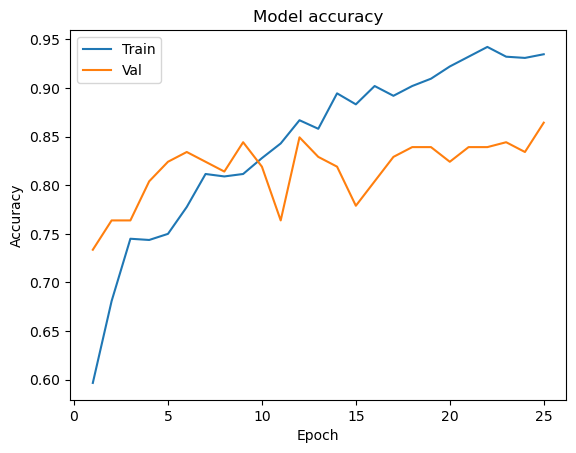

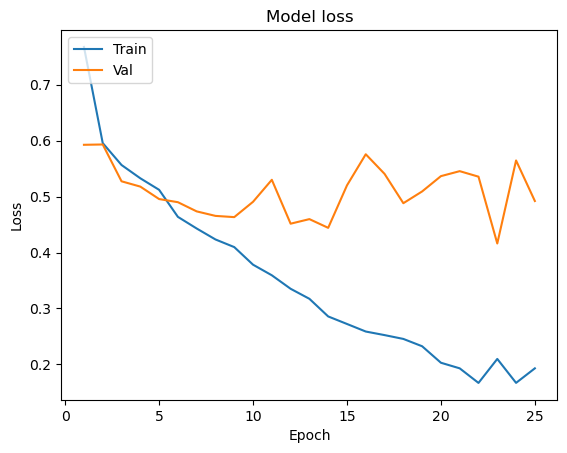

In [460]:
plot_learningCurve(history,25)

In [461]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [462]:
# y_pred = model.predict_classes(X_test)
predict_y = model.predict(X_test) 
y_pred = np.argmax(predict_y,axis=1)

7/7 [==============================] - 0s 36ms/step


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

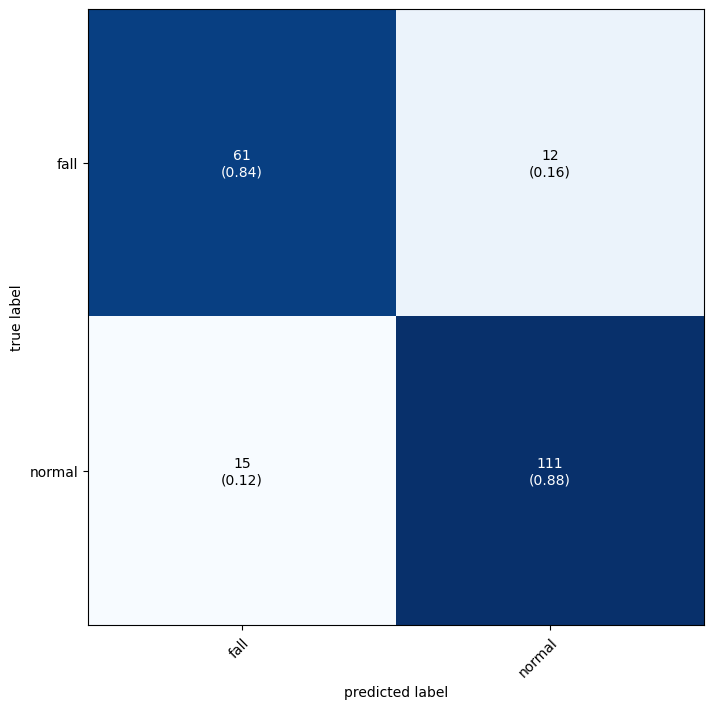

In [463]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=lab.classes_, show_normed=True, figsize=(8,8))

In [464]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 29, 8, 16)         80        
                                                                 
 dropout_36 (Dropout)        (None, 29, 8, 16)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 7, 32)         2080      
                                                                 
 dropout_37 (Dropout)        (None, 28, 7, 32)         0         
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                401472    
                                                                 
 dropout_38 (Dropout)        (None, 64)              

In [465]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

7/7 [==============================] - 0s 41ms/step - loss: 0.4921 - accuracy: 0.8643
[0.49206116795539856, 0.8643215894699097]


In [466]:
model.save('fall detection trained model/model.h5')

In [467]:
from tensorflow.keras.models import load_model
new_model=load_model('fall detection trained model/model.h5')

In [468]:
new_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 29, 8, 16)         80        
                                                                 
 dropout_36 (Dropout)        (None, 29, 8, 16)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 7, 32)         2080      
                                                                 
 dropout_37 (Dropout)        (None, 28, 7, 32)         0         
                                                                 
 flatten_12 (Flatten)        (None, 6272)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                401472    
                                                                 
 dropout_38 (Dropout)        (None, 64)              

In [469]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=tf_lite_converter.convert()
open('tfconvertedmodel.tflite','wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptzqy265t/assets


INFO:tensorflow:Assets written to: /tmp/tmptzqy265t/assets
2023-05-20 00:31:34.644739: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-05-20 00:31:34.644771: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-05-20 00:31:34.644911: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmptzqy265t
2023-05-20 00:31:34.646663: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-05-20 00:31:34.646695: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmptzqy265t
2023-05-20 00:31:34.654115: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-05-20 00:31:34.721449: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmptzqy265t
2023-05-20 00:31:34.737927: I tensorflow/cc/saved_model/loader.cc:305] SavedModel

1618160